# Método de relajación


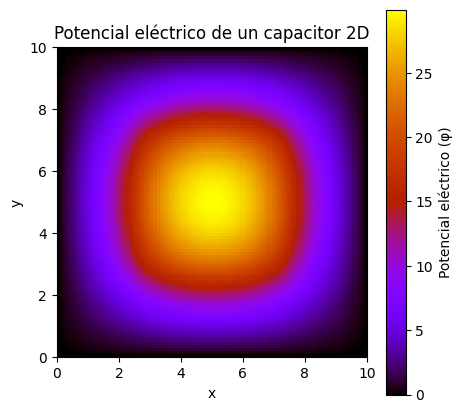

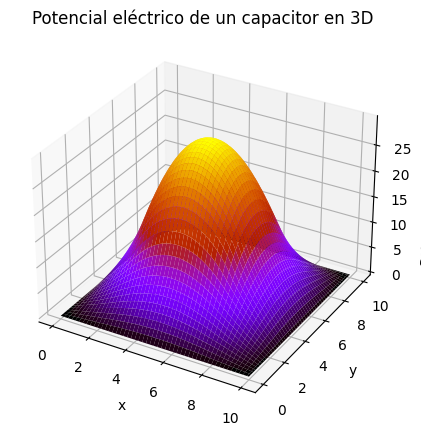

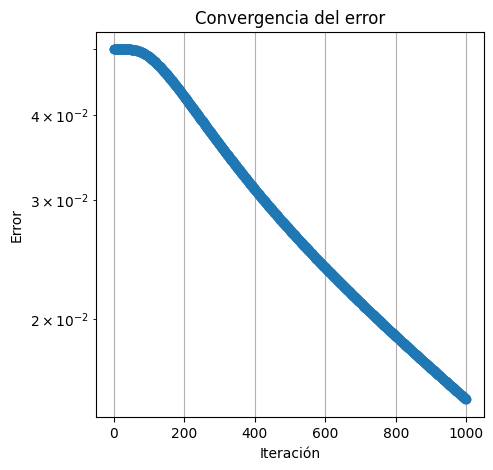

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros y condiciones iniciales
Lx = 10.0  # Longitud en el eje x
Ly = 10.0  # Longitud en el eje y
Nx = 100   # Número de puntos en el eje x
Ny = 100   # Número de puntos en el eje y
dx = Lx / Nx
dy = Ly / Ny

#Inicializar variables
phi = np.zeros((Nx, Ny))
rho = np.zeros((Nx, Ny))
errors = []

#Densidad de carga
rho_inside_capacitor = 10.0
rho[Nx//4:3*Nx//4, Ny//4:3*Ny//4] = rho_inside_capacitor

#Condiciones de frontera
phi[:, 0] = 0  # Placa inferior
phi[:, -1] = 0  # Placa superior

#Bucle de relajación
max_iter = 1000
tolerance = 1e-4

for iteration in range(max_iter):
    old_phi = phi.copy()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + dx**2 * rho[i, j])

   #Error
    error = np.max(np.abs(phi - old_phi))
    errors.append(error)

    #Convergencia
    if error < tolerance:
        break

# Grafica del potencial eléctrico 2D
plt.figure(figsize=(5, 5))
plt.imshow(phi, extent=[0, Lx, 0, Ly], origin='lower', cmap='gnuplot')
plt.colorbar(label='Potencial eléctrico (φ)')
plt.title('Potencial eléctrico de un capacitor 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Grafica del potencial eléctrico 3D
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi.T, cmap='gnuplot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potencial eléctrico (φ)')
ax.set_title('Potencial eléctrico de un capacitor en 3D')
plt.show()

# Graficar del error vs iteraciones
plt.figure(figsize=(5, 5))
plt.semilogy(errors, marker='o', linestyle='-')
plt.title('Convergencia del error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()
